In [ ]:
# ! pip install gseapy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter

import itertools
import random

import scipy
from tqdm import tqdm

plt.ion()
plt.show()
import pickle
import os
import sys
sys.path.append("..")
import gseapy as gp
from gseapy.plot import barplot, dotplot

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
names = gp.get_library_name() # default: Human
names

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'Cancer_Cell_Line_Encyclopedia',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbations_from_GEO_up',
 'Disease_Signatures_from_GEO_down_2014',
 'Disease_Signatures_from_GEO_up_2014',
 'DrugMatrix',
 'Drug_Perturbations_from_GEO_2014',
 'Drug_Perturbations_from_GEO_down',
 'Drug_Perturb

In [4]:
gene_sets = ['GO_Biological_Process_2013',
 'GO_Biological_Process_2015',
 'GO_Biological_Process_2017',
 'GO_Biological_Process_2017b',
 'GO_Biological_Process_2018',
 'GO_Cellular_Component_2013',
 'GO_Cellular_Component_2015',
 'GO_Cellular_Component_2017',
 'GO_Cellular_Component_2017b',
 'GO_Cellular_Component_2018',
 'GO_Molecular_Function_2013',
 'GO_Molecular_Function_2015',
 'GO_Molecular_Function_2017',
 'GO_Molecular_Function_2017b',
 'GO_Molecular_Function_2018',]

# BRCA analysis

In [5]:
filename ="BRCA"
data = pd.read_pickle(f"data/rna_data/{filename}.pkl")
solutions = pd.read_pickle(f"data/rna_data/{filename}_solutions.pkl")

In [6]:
input_genes = data.columns[:-1]
input_genes = np.array([g.split('|')[0] for g in input_genes])

In [7]:
# barplot(enr.res2d,title='Barplot', cutoff=0.05)
# dotplot(enr.res2d, title='Dotplot',cutoff=0.05)

2020-06-13 10:23:26,527 Warning: No enrich terms using library GO_Biological_Process_2013 when cutoff = 0.05
2020-06-13 10:23:30,052 Warning: No enrich terms using library GO_Biological_Process_2017 when cutoff = 0.05
2020-06-13 10:23:32,110 Warning: No enrich terms using library GO_Biological_Process_2017b when cutoff = 0.05
2020-06-13 10:23:33,858 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-06-13 10:23:35,387 Warning: No enrich terms using library GO_Cellular_Component_2013 when cutoff = 0.05
2020-06-13 10:23:36,889 Warning: No enrich terms using library GO_Cellular_Component_2015 when cutoff = 0.05
2020-06-13 10:23:38,394 Warning: No enrich terms using library GO_Cellular_Component_2017 when cutoff = 0.05
2020-06-13 10:23:39,979 Warning: No enrich terms using library GO_Cellular_Component_2017b when cutoff = 0.05
2020-06-13 10:23:41,512 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-06-13 10:23:

analyzing subspace 1 of size 38


<Figure size 432x288 with 0 Axes>

ontology [], 0 functions


2020-06-13 10:23:51,538 Warning: No enrich terms using library GO_Biological_Process_2013 when cutoff = 0.05
2020-06-13 10:23:53,549 Warning: No enrich terms using library GO_Biological_Process_2015 when cutoff = 0.05
2020-06-13 10:23:55,190 Warning: No enrich terms using library GO_Biological_Process_2017 when cutoff = 0.05
2020-06-13 10:23:57,077 Warning: No enrich terms using library GO_Biological_Process_2017b when cutoff = 0.05
2020-06-13 10:23:58,821 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-06-13 10:24:00,362 Warning: No enrich terms using library GO_Cellular_Component_2013 when cutoff = 0.05
2020-06-13 10:24:01,903 Warning: No enrich terms using library GO_Cellular_Component_2015 when cutoff = 0.05
2020-06-13 10:24:03,441 Warning: No enrich terms using library GO_Cellular_Component_2017 when cutoff = 0.05
2020-06-13 10:24:05,100 Warning: No enrich terms using library GO_Cellular_Component_2017b when cutoff = 0.05
2020-06-13 10:24:

analyzing subspace 5 of size 55


<Figure size 432x288 with 0 Axes>

ontology [], 0 functions
analyzing subspace 8 of size 231


<Figure size 432x288 with 0 Axes>

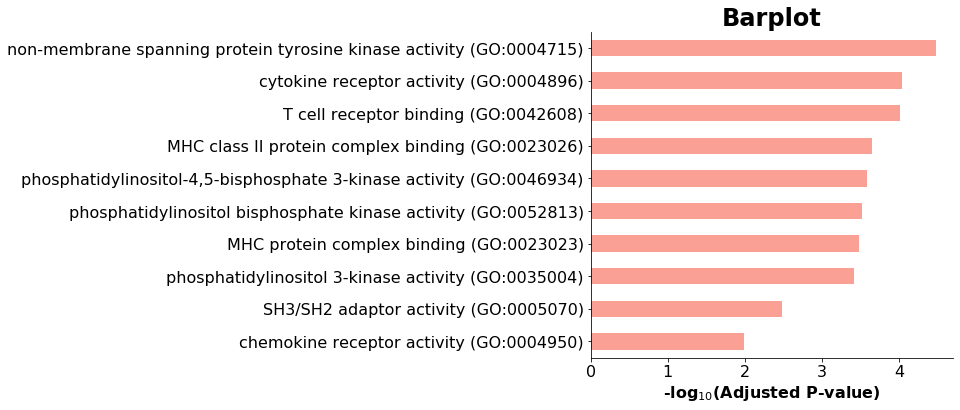

ontology ['GO_Molecular_Function_2018'], 13 functions


In [21]:
for i, subspace in enumerate(solutions["features"].values):
    if len(subspace) >10:
        gene_list = [ input_genes[s] for s in subspace]
        enr = gp.enrichr(
                     gene_list=gene_list,
                     description='test_name',
                     gene_sets=gene_sets,
                     outdir='test/enrichr_kegg',
                     cutoff=0.05 # test dataset, use lower value from range(0,1)
                    )
        
        print(f"analyzing subspace {i} of size {len(subspace)}")
        plt.figure()
        barplot(enr.res2d,title='Barplot', cutoff=0.05)
        plt.show()
        
        dd = enr.res2d[enr.res2d["Adjusted P-value"]<=0.05][["Gene_set", "Term"]].drop_duplicates()
        ontology = dd["Gene_set"].unique()
        print(f"ontology { ontology}, {dd.shape[0]} functions")


# KIRP analysis

In [22]:
filename ="KIRP" 
data = pd.read_pickle(f"data/rna_data/{filename}.pkl")
solutions = pd.read_pickle(f"data/rna_data/{filename}_solutions.pkl")

In [23]:
input_genes = data.columns[:-1]
input_genes = np.array([g.split('|')[0] for g in input_genes])

In [24]:
# barplot(enr.res2d,title='Barplot', cutoff=0.05)
# dotplot(enr.res2d, title='Dotplot',cutoff=0.05)

analyzing subspace 0 of size 96


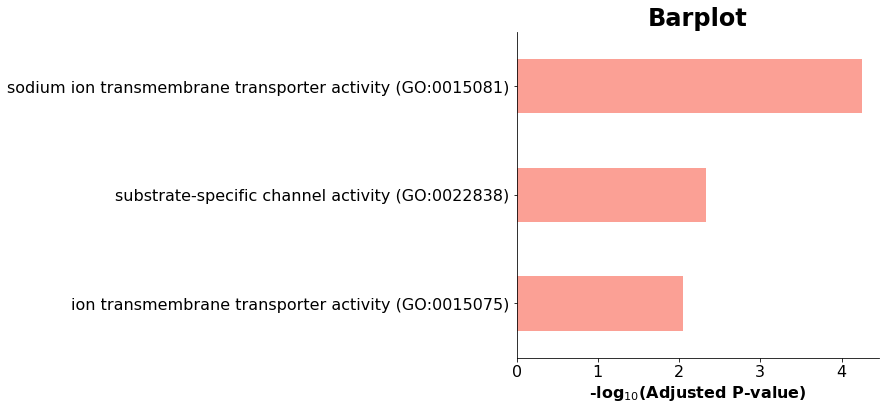

ontology ['GO_Molecular_Function_2018'], 3 functions


2020-06-13 12:20:20,156 Warning: No enrich terms using library GO_Biological_Process_2013 when cutoff = 0.05
2020-06-13 12:20:21,711 Warning: No enrich terms using library GO_Biological_Process_2015 when cutoff = 0.05
2020-06-13 12:20:23,204 Warning: No enrich terms using library GO_Biological_Process_2017 when cutoff = 0.05
2020-06-13 12:20:24,790 Warning: No enrich terms using library GO_Biological_Process_2017b when cutoff = 0.05
2020-06-13 12:20:26,324 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-06-13 12:20:27,869 Warning: No enrich terms using library GO_Cellular_Component_2013 when cutoff = 0.05
2020-06-13 12:20:29,368 Warning: No enrich terms using library GO_Cellular_Component_2015 when cutoff = 0.05
2020-06-13 12:20:30,867 Warning: No enrich terms using library GO_Cellular_Component_2017 when cutoff = 0.05
2020-06-13 12:20:32,339 Warning: No enrich terms using library GO_Cellular_Component_2017b when cutoff = 0.05
2020-06-13 12:20:

analyzing subspace 3 of size 11
ontology [], 0 functions


2020-06-13 12:20:43,208 Warning: No enrich terms using library GO_Biological_Process_2013 when cutoff = 0.05
2020-06-13 12:20:44,937 Warning: No enrich terms using library GO_Biological_Process_2015 when cutoff = 0.05
2020-06-13 12:20:46,529 Warning: No enrich terms using library GO_Biological_Process_2017 when cutoff = 0.05
2020-06-13 12:20:48,456 Warning: No enrich terms using library GO_Biological_Process_2017b when cutoff = 0.05
2020-06-13 12:20:50,192 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-06-13 12:20:51,746 Warning: No enrich terms using library GO_Cellular_Component_2013 when cutoff = 0.05
2020-06-13 12:20:53,274 Warning: No enrich terms using library GO_Cellular_Component_2015 when cutoff = 0.05
2020-06-13 12:20:54,823 Warning: No enrich terms using library GO_Cellular_Component_2017 when cutoff = 0.05
2020-06-13 12:20:58,136 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-06-13 12:20:5

analyzing subspace 5 of size 40
ontology [], 0 functions


2020-06-13 12:21:07,881 Warning: No enrich terms using library GO_Biological_Process_2013 when cutoff = 0.05
2020-06-13 12:21:09,359 Warning: No enrich terms using library GO_Biological_Process_2015 when cutoff = 0.05
2020-06-13 12:21:10,840 Warning: No enrich terms using library GO_Biological_Process_2017 when cutoff = 0.05
2020-06-13 12:21:12,472 Warning: No enrich terms using library GO_Biological_Process_2017b when cutoff = 0.05
2020-06-13 12:21:13,995 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-06-13 12:21:15,476 Warning: No enrich terms using library GO_Cellular_Component_2013 when cutoff = 0.05
2020-06-13 12:21:16,996 Warning: No enrich terms using library GO_Cellular_Component_2015 when cutoff = 0.05
2020-06-13 12:21:18,511 Warning: No enrich terms using library GO_Cellular_Component_2017 when cutoff = 0.05
2020-06-13 12:21:20,023 Warning: No enrich terms using library GO_Cellular_Component_2017b when cutoff = 0.05
2020-06-13 12:21:

analyzing subspace 6 of size 13
ontology [], 0 functions


2020-06-13 12:21:30,993 Warning: No enrich terms using library GO_Biological_Process_2013 when cutoff = 0.05
2020-06-13 12:21:53,098 Warning: No enrich terms using library GO_Molecular_Function_2017 when cutoff = 0.05
2020-06-13 12:21:54,858 Warning: No enrich terms using library GO_Molecular_Function_2017b when cutoff = 0.05


analyzing subspace 7 of size 102


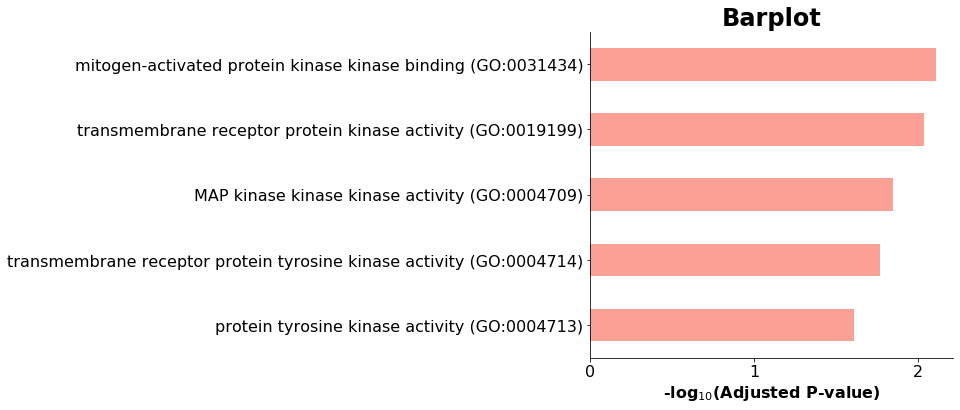

ontology ['GO_Molecular_Function_2018'], 5 functions


2020-06-13 12:22:02,145 Warning: No enrich terms using library GO_Biological_Process_2017 when cutoff = 0.05
2020-06-13 12:22:03,766 Warning: No enrich terms using library GO_Biological_Process_2017b when cutoff = 0.05
2020-06-13 12:22:06,885 Warning: No enrich terms using library GO_Cellular_Component_2013 when cutoff = 0.05
2020-06-13 12:22:09,972 Warning: No enrich terms using library GO_Cellular_Component_2017 when cutoff = 0.05
2020-06-13 12:22:13,119 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


analyzing subspace 11 of size 18


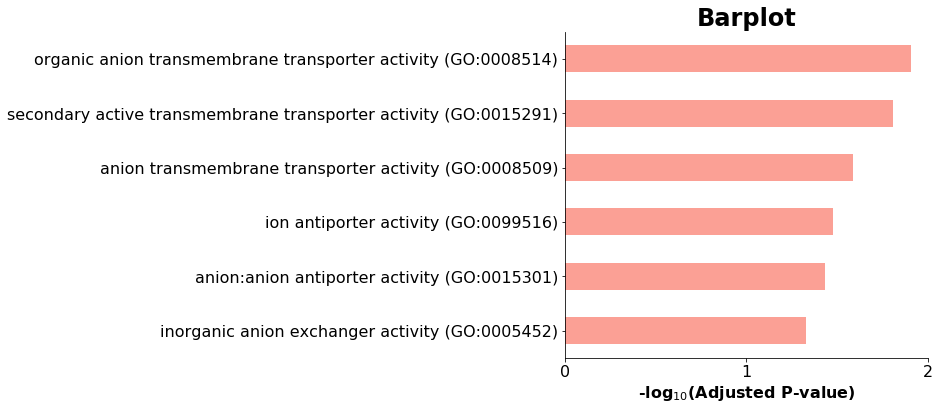

ontology ['GO_Molecular_Function_2018'], 6 functions


2020-06-13 12:22:23,501 Warning: No enrich terms using library GO_Biological_Process_2013 when cutoff = 0.05
2020-06-13 12:22:25,205 Warning: No enrich terms using library GO_Biological_Process_2015 when cutoff = 0.05
2020-06-13 12:22:26,835 Warning: No enrich terms using library GO_Biological_Process_2017 when cutoff = 0.05
2020-06-13 12:22:28,696 Warning: No enrich terms using library GO_Biological_Process_2017b when cutoff = 0.05
2020-06-13 12:22:30,368 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-06-13 12:22:31,894 Warning: No enrich terms using library GO_Cellular_Component_2013 when cutoff = 0.05
2020-06-13 12:22:40,225 Warning: No enrich terms using library GO_Molecular_Function_2013 when cutoff = 0.05
2020-06-13 12:22:43,453 Warning: No enrich terms using library GO_Molecular_Function_2017 when cutoff = 0.05
2020-06-13 12:22:45,159 Warning: No enrich terms using library GO_Molecular_Function_2017b when cutoff = 0.05
2020-06-13 12:22:

analyzing subspace 12 of size 39
ontology [], 0 functions


2020-06-13 12:22:48,548 Warning: No enrich terms using library GO_Biological_Process_2013 when cutoff = 0.05
2020-06-13 12:22:50,488 Warning: No enrich terms using library GO_Biological_Process_2015 when cutoff = 0.05
2020-06-13 12:22:52,102 Warning: No enrich terms using library GO_Biological_Process_2017 when cutoff = 0.05
2020-06-13 12:22:53,996 Warning: No enrich terms using library GO_Biological_Process_2017b when cutoff = 0.05
2020-06-13 12:22:55,718 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-06-13 12:22:57,259 Warning: No enrich terms using library GO_Cellular_Component_2013 when cutoff = 0.05
2020-06-13 12:22:58,773 Warning: No enrich terms using library GO_Cellular_Component_2015 when cutoff = 0.05
2020-06-13 12:23:00,288 Warning: No enrich terms using library GO_Cellular_Component_2017 when cutoff = 0.05
2020-06-13 12:23:01,924 Warning: No enrich terms using library GO_Cellular_Component_2017b when cutoff = 0.05
2020-06-13 12:23:

analyzing subspace 13 of size 46
ontology [], 0 functions
analyzing subspace 16 of size 198


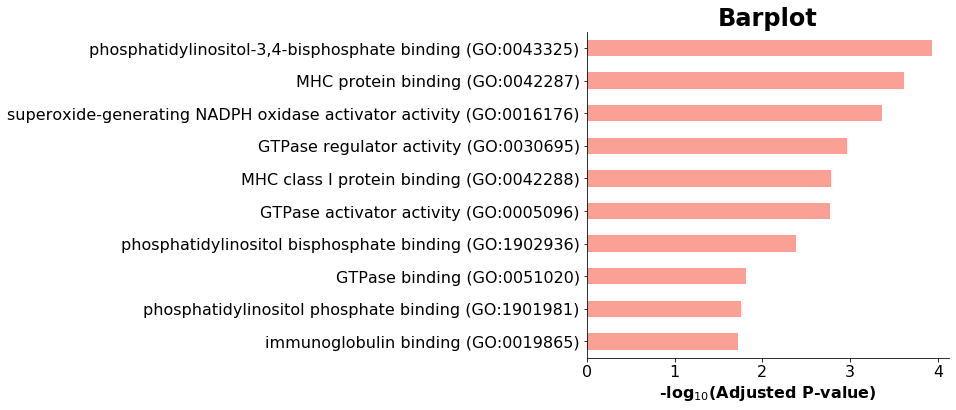

ontology ['GO_Molecular_Function_2018'], 12 functions


2020-06-13 12:23:44,593 Warning: No enrich terms using library GO_Biological_Process_2013 when cutoff = 0.05
2020-06-13 12:23:46,180 Warning: No enrich terms using library GO_Biological_Process_2015 when cutoff = 0.05
2020-06-13 12:23:47,660 Warning: No enrich terms using library GO_Biological_Process_2017 when cutoff = 0.05
2020-06-13 12:23:49,380 Warning: No enrich terms using library GO_Biological_Process_2017b when cutoff = 0.05
2020-06-13 12:23:50,960 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-06-13 12:23:52,438 Warning: No enrich terms using library GO_Cellular_Component_2013 when cutoff = 0.05
2020-06-13 12:23:53,928 Warning: No enrich terms using library GO_Cellular_Component_2015 when cutoff = 0.05
2020-06-13 12:23:55,417 Warning: No enrich terms using library GO_Cellular_Component_2017 when cutoff = 0.05
2020-06-13 12:23:58,623 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-06-13 12:24:0

analyzing subspace 18 of size 13
ontology [], 0 functions


In [26]:
for i, subspace in enumerate(solutions["features"].values):
    if len(subspace) >10:
        gene_list = [ input_genes[s] for s in subspace]
        enr = gp.enrichr(
                     gene_list=gene_list,
                     description='test_name',
                     gene_sets=gene_sets,
                     outdir='test/enrichr_kegg',
                     cutoff=0.05 # test dataset, use lower value from range(0,1)
                    )
        print(f"analyzing subspace {i} of size {len(subspace)}")
        barplot(enr.res2d,title='Barplot', cutoff=0.05)
        plt.show()
        
        dd = enr.res2d[enr.res2d["Adjusted P-value"]<=0.05][["Gene_set", "Term"]].drop_duplicates()
        ontology = dd["Gene_set"].unique()
        print(f"ontology { ontology}, {dd.shape[0]} functions")
        
        

In [28]:
26/4

6.5